# Binary classification on the breast cancer dataset from `sklearn`

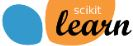
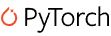
-----------
The purpose of this notebook is to take advantage of the PyTorch and sklearn libraries in order to solve a classifcation problem. 

The breast cancer dataset is a classic and very easy binary classification dataset. It consists of input samples with 30 features that belong to one out of two classes. The two classes of this dataset are *Benign*(not harmful) or *Malignant*(harmful). 

-----------
Workflow for solving a classifaction problem of this nature:
1. Prepare and analyze data
2. Pick or build a model
3. Pick a loss function and optimizer
4. Build a training loop / Train the model
5. Evaluate the model
6. Propose changes / improve model

## 1. **Preparing**, **visualizing** and **analyzing** data

### 1.0 Loading the dataset

In [335]:
from sklearn.datasets import load_breast_cancer, load_diabetes, load_boston
import pandas as pd
data = load_breast_cancer()

#printing dataset information
print(f"Number of samples: {len(data.target)}\nNumber of featuers = {len(data.feature_names)}\nFeatures names: {data.feature_names}\nTargets: {data.target_names}") 


Number of samples: 569
Number of featuers = 30
Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Targets: ['malignant' 'benign']


In [336]:
# Visualizing in panda dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"]= data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [337]:
X = data.data
y = data.target
X[0], y[0]

(array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]), 0)

### 1.1 Scaling the data with `sklearn.preprocessing.StandardScaler`

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

In [338]:
#Using
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
transformed = scaler.fit_transform(X)
X[0], transformed[0]

(array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]),
 array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]))

### 1.2 Splitting the dataset into training and testing data with `sklearn.model_selection.train_test_split`

In [339]:
# First turn data from numpy arrays into tensors since PyTorch models expect tensor inputs for training
import torch
X = torch.from_numpy(transformed).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [340]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible
len(X_train), len(X_test), len(y_train), len(y_test)

(455, 114, 455, 114)

### 1.3 Creating a torch dataset

In [341]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.labels = labels
        self.features = features
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        label = self.labels[idx]
        features = self.features[idx]
        return features, label

In [342]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [343]:
# Display text and label.
print(f"First iteration of dataset: {train_dataset.__getitem__(0)}")
print(f'Length of train data set: {train_dataset.__len__()}\n')
# Print entire data set
#print('Entire data set: ', list(DataLoader(td)), '\n')

First iteration of dataset: (tensor([-1.4480, -0.4560, -1.3667, -1.1501,  0.7287,  0.7004,  2.8148, -0.1333,
         1.0930,  2.5038, -0.2807, -0.0415, -0.4857, -0.4987,  0.8360,  3.3859,
         9.0156,  3.4752,  2.5944,  2.1803, -1.2340, -0.4930, -1.2439, -0.9772,
         0.6940,  1.1593,  4.7007,  0.9196,  2.1472,  1.8594]), tensor(1.))
Length of train data set: 455



### 1.4 Loading torch train dataset into torch dataloader

The dataloader is used to batch the data for training.

In [344]:
from torch.utils.data import DataLoader

In [345]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)
len(train_dataloader)

455

In [346]:
# Lets get a sample from the dataloader and see what i yields
features, label = next(iter(train_dataloader))
print(f"This is the size the first batch consisting of 10 samples with 30 features in each sample: {features.shape}")
print(f"This are the label for these 10 samples: {label}")

This is the size the first batch consisting of 10 samples with 30 features in each sample: torch.Size([1, 30])
This are the label for these 10 samples: tensor([1.])


## 2. **Choose** or **build** a model

In [347]:
import torch
from torch import nn

# Make device agnostic code, this is done in order to bring data, models and other objects onto the same device. If objects are on different devices they will not be able to interact with each other. 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [348]:
input_shape = X_train.shape[1]        # number fo features in the input data sample
output_shape = len(data.target_names) # number of different classes
hidden_neurons = 5                    # number fo hidden neureons in the hidden layer

In [349]:
# 1. Construct a model class that subclasses nn.Module
class RegressionModelV0(nn.Module):
    def __init__(self,input_shape, output_shape, hidden_neurons):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=input_shape, out_features=hidden_neurons) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.ReLU()
        self.layer_3 = nn.Linear(in_features=hidden_neurons, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_3(self.layer_2(self.layer_1(x))) # computation goes through layer_1 first then the output of layer_1 goes through layer_2



RegressionModelV0(
  (layer_1): Linear(in_features=30, out_features=5, bias=True)
  (layer_2): ReLU()
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# 4. Create an object instance of the model and send it to target device
model_0 = RegressionModelV0(input_shape=input_shape, output_shape=output_shape, hidden_neurons=hidden_neurons).to(device)
model_0

## 3. **Choose** a loss function and optimizer

In [350]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.01)

In [351]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

##4. **Build** a training looop

In [352]:
%time

torch.manual_seed(42)

# Setting the number of epocs for training
epochs = 200

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    #y_preds = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}%")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
Epoch: 0 | Loss: 0.62240, Accuracy: 62.42%
Epoch: 10 | Loss: 0.60346, Accuracy: 65.27%
Epoch: 20 | Loss: 0.58465, Accuracy: 68.57%
Epoch: 30 | Loss: 0.56556, Accuracy: 72.53%
Epoch: 40 | Loss: 0.54650, Accuracy: 80.00%
Epoch: 50 | Loss: 0.52742, Accuracy: 83.74%
Epoch: 60 | Loss: 0.50827, Accuracy: 85.27%
Epoch: 70 | Loss: 0.48834, Accuracy: 88.79%
Epoch: 80 | Loss: 0.46839, Accuracy: 90.55%
Epoch: 90 | Loss: 0.44902, Accuracy: 91.65%
Epoch: 100 | Loss: 0.43062, Accuracy: 92.09%
Epoch: 110 | Loss: 0.41324, Accuracy: 92.75%
Epoch: 120 | Loss: 0.39669, Accuracy: 92.97%
Epoch: 130 | Loss: 0.38107, Accuracy: 92.97%
Epoch: 140 | Loss: 0.36642, Accuracy: 92.75%
Epoch: 150 | Loss: 0.35263, Accuracy: 93.19%
Epoch: 160 | Loss: 0.33972, Accuracy: 93.19%
Epoch: 170 | Loss: 0.32762, Accuracy: 93.63%
Epoch: 180 | Loss: 0.31624, Accuracy: 93.85%
Epoch: 190 | Loss: 0.30547, Accuracy: 93.85%


## 5. **Evaluate** the model

The Model is evaluated by running the test dataset in `torch.inference_mode()`
results are presented with metrics from `sklearn.metrics` and visualized with a confusion matrix!

In [353]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

In [354]:
#Testing the test_dataset
model_0.eval()
with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze() 
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate loss
    test_loss = loss_fn(test_logits,
                        y_test)


Test loss: 0.28508061170578003
Test Accuracy: 0.9649122807017544
Precision:0.958904109589041 
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
Confusion Matrix:


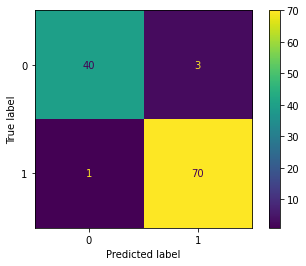

In [355]:
c_matrix = confusion_matrix(y_test, test_pred)

ConfusionMatrixDisplay(c_matrix).plot()
print(f"Test loss: {test_loss}\nTest Accuracy: {accuracy_score(y_test, test_pred)}\nPrecision:{precision_score(y_test, test_pred)} \nRecall: {recall_score(y_test, test_pred)}\nF1 Score: {f1_score(y_test, test_pred)}\nConfusion Matrix:")

## 6. **Propose** changes / **improve** model


Hyperparamters that comes to mind that can be adjusted in a project like this and possibly improve performance:

* Layer architecture
  * number of layers 
  * number of neurons per layer
  * kind of layers 
  * activation functions.
* Training epochs
* Loss function
* Optimizer
  * learning rate
  * momentum
* The Scaling approach of initial data
* Adjust the batch size for the dataloader